<a href="https://colab.research.google.com/github/shyoonCS/Data-Analysis-with-Open-Source/blob/main/%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_9%EA%B0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오픈소스 기반 데이터 분석 9강

- 런타임 -> 런타임 유형 변경 (GPU 로 설정)

In [2]:
# 한글 처리를 위한 matplotlib 설정 (1)

!sudo apt-get install -y fonts-nanum
!sudo fc-cache –fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


- 런타임 -> 세션 다시 시작

In [3]:
# 한글 처리를 위한 matplotlib 설정 (2)

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

# 통계적 분석 방법론

## 9-1 아이리스 데이터셋 특성 간 상관관계 분석

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## 아이리스 데이터셋 로드
df = sns.load_dataset('iris')

## 상관계수 행렬 계산 및 출력
print("상관계수 행렬:")
print(correlation)

## 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('특성 간 상관관계')
plt.show()

## 9-2 아이리스 데이터셋 다중 선형 회귀 모델 구축 및 시각화

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     734.4
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           7.83e-88
Time:                        07:25:28   Log-Likelihood:                 36.751
No. Observations:                 150   AIC:                            -65.50
Df Residuals:                     146   BIC:                            -53.46
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2403      0.178     -1.347   

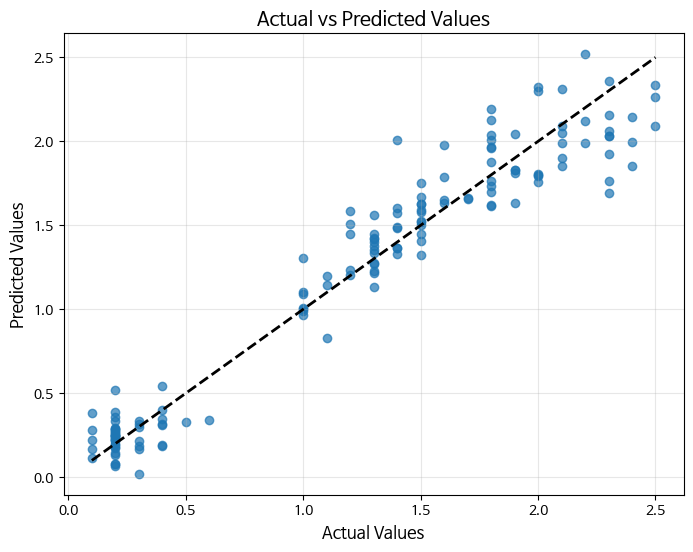

In [3]:
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt

## 아이리스 데이터셋 로드
df = sns.load_dataset('iris')

## 다중 선형 회귀 모델 생성 및 학습
## 'petal_width'를 종속 변수로 하고 다른 특성들(sepal_length, sepal_width, petal_length)을 독립 변수로 사용
model = smf.ols(
    formula = 'petal_width ~ sepal_length + sepal_width + petal_length',
    data = df
).fit()

## 모델 요약 결과 출력
print(model.summary())

## 실제 값 vs 예측 값 시각화
plt.figure(figsize=(8, 6))
predictions = model.predict(df) ## 모델 예측값 계산
plt.scatter(df['petal_width'], predictions, alpha=0.7) ## 실제 값과 예측 값 산점도
plt.plot([df['petal_width'].min(), df['petal_width'].max()],
         [df['petal_width'].min(), df['petal_width'].max()], 'k--', lw=2) ## 이상적인 예측 라인 (y=x)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted Values', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

## 9-3 아이리스 데이터셋 t-검정 수행

In [5]:
import seaborn as sns
from statsmodels.stats.weightstats import ttest_ind

## 아이리스 데이터셋 로드
df = sns.load_dataset('iris')

## 비교할 두 품종의 꽃받침 길이 데이터 추출
setosa = df[df['species'] == 'setosa']['sepal_length']
versicolor = df[df['species'] == 'versicolor']['sepal_length']

## 독립 표본 t-검정 수행
## 두 그룹(setosa, versicolor)의 'sepal_length' 평균이 통계적으로 유의미한 차이가 있는지 검정
t_stat, p_val, df_dof = ttest_ind(setosa, versicolor)
'''
t_stat (또는 statistic)
t 통계량: 두 그룹의 평균 차이를 표준 오차로 나눈 값.
값이 클수록 두 그룹의 평균 차이가 크다고 볼 수 있음.
부호는 첫 번째 그룹(setosa)이 두 번째 그룹(versicolor)보다 크면 양수, 작으면 음수.

p_val
p-값: 귀무가설(두 그룹 평균이 같다)이 참일 확률.
일반적으로 0.05보다 작으면 귀무가설 기각 → 평균 차이가 통계적으로 유의미함.

df_dof
자유도 (degrees of freedom): 검정에 사용되는 표본 수에 따라 결정되는 값.
equal_var=False로 Welch’s t-test를 수행할 경우 반환되며, 표본 분산이 다를 수 있다고 가정할 때 더 신뢰성 있는 검정.
'''

## t-통계량과 p-값 출력
print(f"t-통계량: {t_stat:.4f}, p-값: {p_val:.4f}")
print(df_dof)
## 검정 결과 해석
if p_val < 0.05:
    print("귀무가설 기각: 두 품종의 꽃받침 길이에 유의한 차이가 있다")
else:
    print("귀무가설 채택: 두 품종의 꽃받침 길이에 유의한 차이가 없다")

t-통계량: -10.5210, p-값: 0.0000
98.0
귀무가설 기각: 두 품종의 꽃받침 길이에 유의한 차이가 있다


## 9-4 아이리스 데이터셋 일원 분산 분석 (ANOVA)

In [7]:
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

## 아이리스 데이터셋 로드
df = sns.load_dataset('iris')
print(df.head())

## 일원 분산 분석(ANOVA) 모델 생성 및 학습 : 3개 이상 데이터 그룹 비교
## 'sepal_length'에 대한 'species'의 영향 분석
model = ols('sepal_length ~ C(species)', data=df).fit()
'''
C(species)는 statsmodels에게 species는 범주형 변수이므로 **자동으로 더미 변수(dummy variables)**로 변환해 달라고 지시 , #onehot encoding 유사
sepal_length = β₀ + β₁*(versicolor) + β₂*(virginica) + ε
'''

## ANOVA 테이블 생성 및 출력
anova_table = sm.stats.anova_lm(model, type=2)
print("ANOVA 결과:")
print(anova_table)

## p-값을 이용한 결과 해석
p_val = anova_table['PR(>F)'][0]
if p_val < 0.05:
    print("\n결과: 귀무가설 기각 (p < 0.05)")
    print("세 품종 간 꽃받침 길이에 통계적으로 유의미한 차이가 존재합니다.")
else:
    print("\n결과: 귀무가설 채택 (p >= 0.05)")
    print("세 품종 간 꽃받침 길이에 유의미한 차이가 없습니다.")

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
ANOVA 결과:
               df     sum_sq    mean_sq           F        PR(>F)
C(species)    2.0  63.212133  31.606067  119.264502  1.669669e-31
Residual    147.0  38.956200   0.265008         NaN           NaN

결과: 귀무가설 기각 (p < 0.05)
세 품종 간 꽃받침 길이에 통계적으로 유의미한 차이가 존재합니다.


/tmp/ipython-input-1960985738.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_val = anova_table['PR(>F)'][0]


## 9-5 시계열 데이터 분석 (항공 승객 수)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49849 (\N{HANGUL SYLLABLE SEUNG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


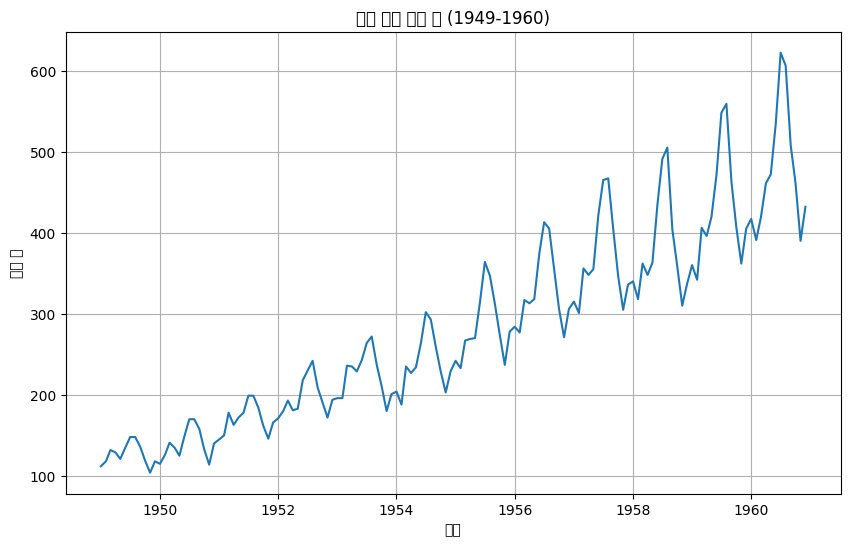

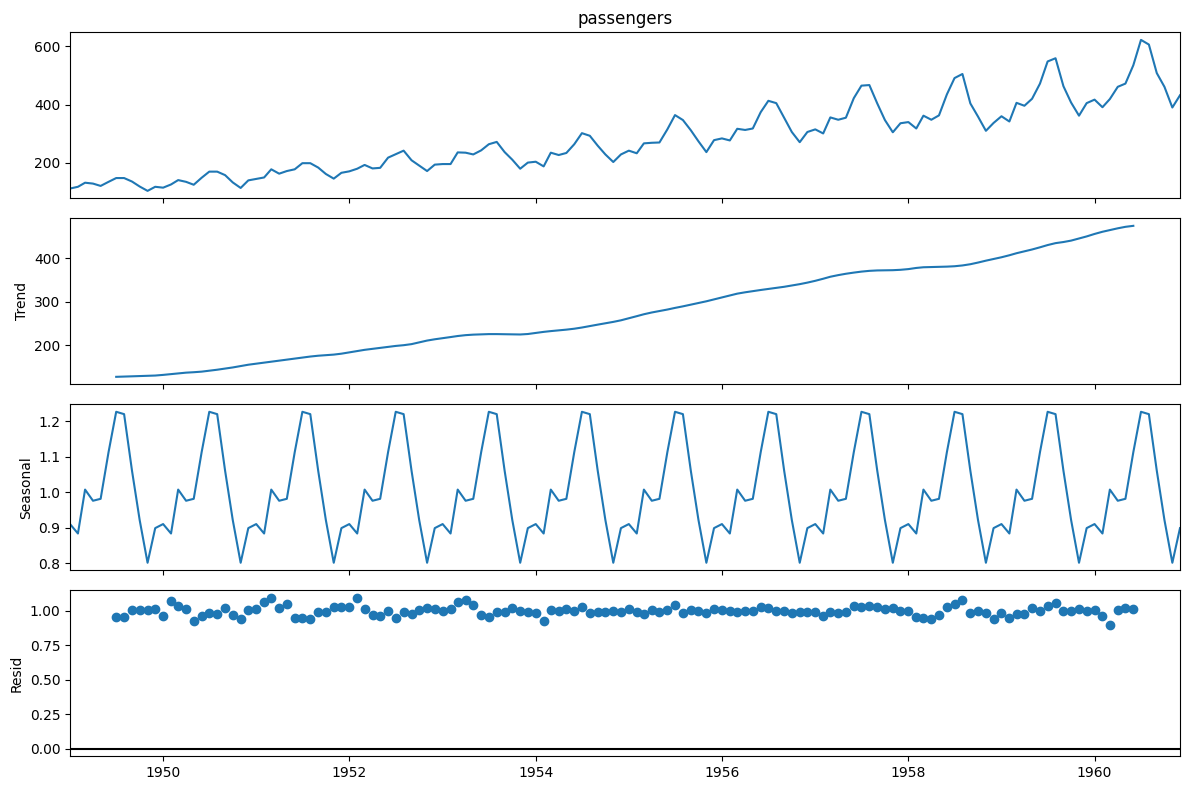

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose # tsa time seasonal analysis

## seaborn에서 flights 데이터셋 로드
flights = sns.load_dataset('flights')

## 날짜 형식 변환 및 인덱스 설정
## 'year'와 'month' 컬럼을 이용하여 'date' 컬럼 생성 후 인덱스로 설정
flights['date'] = pd.to_datetime(
    flights['year'].astype(str) + '-' +
    flights['month'].astype(str) + '-01'
)
flights = flights.set_index('date').sort_index()

## 시계열 시각화
plt.figure(figsize=(10, 6))
plt.plot(flights['passengers'])
plt.title('월별 항공 승객 수 (1949-1960)')
plt.xlabel('연도')
plt.ylabel('승객 수')
plt.grid(True)
plt.show()

## 시계열 분해 (추세, 계절성, 잔차)
## 시계열 데이터를 추세(Trend), 계절성(Seasonal), 잔차(Residual)로 분해
decomposition = seasonal_decompose(flights['passengers'], model='multiplicative', period=12)

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.tight_layout()
plt.show()

# 기계학습 기반 분석 방법론

## 9-6 여러 분류 모델 교차 검증 및 성능 비교

In [5]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

## 아이리스 데이터셋 로드
iris = load_iris()
X, y = iris.data, iris.target

## 다양한 분류 모델 정의 //각 모델별  속성(하이퍼파라미터) 지정 필요
models = {
    '로지스틱 회귀' : LogisticRegression(),
    '결정트리' : DecisionTreeClassifier(),
    '랜덤포레스트' : RandomForestClassifier(),
    'SVM' : SVC(),
    'k-NN' : KNeighborsClassifier()

}

## 각 모델별 교차 검증 수행 및 결과 출력 5개로 분할, 4개 학습, 1개 검증
for name, model in models.items():
    # cross_val_score를 이용하여 학습 및 성능 평가를 수행
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    print(f"{name}:")
    print(f"  평균 정확도 = {scores.mean():.4f} (±{scores.std():.4f})")
    print(f"  개별 폴드 점수 = {[round(score, 4) for score in scores]}")
    print("-"*50)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀:
  평균 정확도 = 0.9733 (±0.0249)
  개별 폴드 점수 = [np.float64(0.9667), np.float64(1.0), np.float64(0.9333), np.float64(0.9667), np.float64(1.0)]
--------------------------------------------------
결정트리:
  평균 정확도 = 0.9600 (±0.0327)
  개별 폴드 점수 = [np.float64(0.9667), np.float64(0.9667), np.float64(0.9), np.float64(0.9667), np.float64(1.0)]
--------------------------------------------------
랜덤포레스트:
  평균 정확도 = 0.9667 (±0.0211)
  개별 폴드 점수 = [np.float64(0.9667), np.float64(0.9667), np.float64(0.9333), np.float64(0.9667), np.float64(1.0)]
--------------------------------------------------
SVM:
  평균 정확도 = 0.9667 (±0.0211)
  개별 폴드 점수 = [np.float64(0.9667), np.float64(0.9667), np.float64(0.9667), np.float64(0.9333), np.float64(1.0)]
--------------------------------------------------
k-NN:
  평균 정확도 = 0.9733 (±0.0249)
  개별 폴드 점수 = [np.float64(0.9667), np.float64(1.0), np.float64(0.9333), np.float64(0.9667), np.float64(1.0)]
--------------------------------------------------


## 9-7 여러 회귀 모델 교차 검증 및 성능 비교

In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error, r2_score

## 캘리포니아 주택 데이터셋 로드
california = fetch_california_housing()
X = california.data
y = california.target

## 다양한 회귀 모델 정의
models = {
    '선형 회귀' : LinearRegression(),
    '릿지 회귀' : Ridge(),
    '라쏘 회귀' : Lasso(),
    '결정트리 회귀' : DecisionTreeRegressor(),
    '랜덤포레스트 회귀' : RandomForestRegressor(),
}

## 각 모델별 교차 검증 수행 및 RMSE 출력
for name, model in models.items():
    ## 5-폴드 교차 검증으로 MSE(평균 제곱 오차) 계산
    scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    rmse = (-scores.mean()) ** 0.5 ## MSE를 RMSE로 변환
    print(f"{name}: RMSE = {rmse:.4f}")

선형 회귀: RMSE = 0.7472
릿지 회귀: RMSE = 0.7472
라쏘 회귀: RMSE = 1.0011
결정트리 회귀: RMSE = 0.9084
랜덤포레스트 회귀: RMSE = 0.6548


## 9-8 아이리스 데이터셋 군집화 및 시각화

/tmp/ipython-input-387614626.py:33: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumBarunGothic.
  fig.canvas.print_figure(bytes_io, **kw)


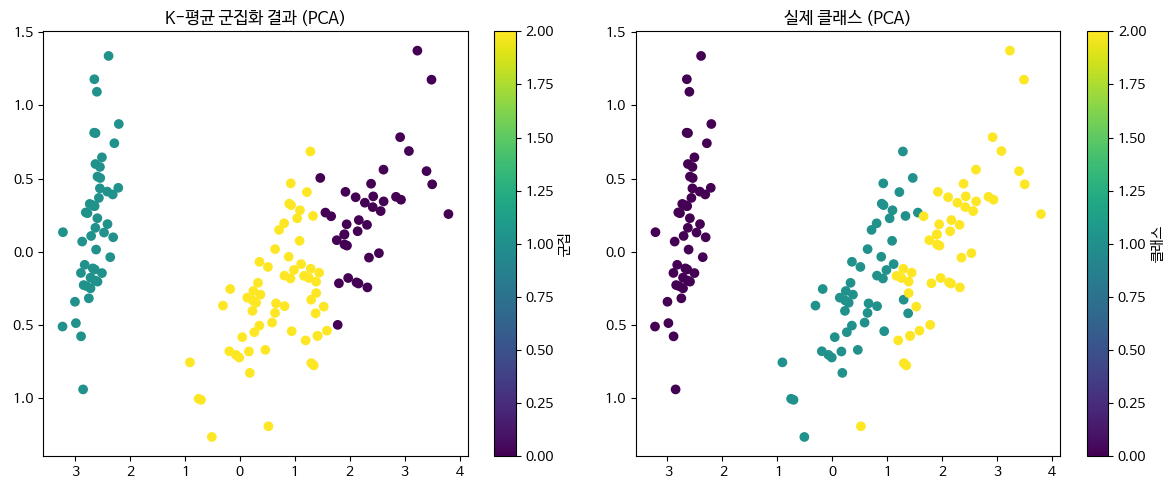

In [4]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

## 아이리스 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target

## K-평균 군집화 수행
kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(X)

## PCA를 이용한 차원 축소 (2차원) 주성분 분석
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

## 군집화 결과 및 실제 클래스 시각화
plt.figure(figsize=(12, 5))

## K-평균 군집화 결과 시각화
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('K-평균 군집화 결과 (PCA)')
plt.colorbar(scatter, label='군집')

## 실제 클래스 시각화
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('실제 클래스 (PCA)')
plt.colorbar(scatter, label='클래스')
plt.tight_layout()
plt.show()

# 딥러닝 기반 분석 방법론

## 9-9 아이리스 데이터셋 신경망 모델 구축 및 평가

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import set_random_seed
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# 랜덤 시드 값 설정
set_random_seed(42)

## 아이리스 데이터셋 로드 및 전처리
iris = load_iris()
X = iris.data
y = tf.keras.utils.to_categorical(iris.target, num_classes=3) ## 타겟 변수를 원-핫 인코딩
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 특성 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 신경망 모델 구축
# 이 모델은 다층 퍼셉트론(MLP) 신경망으로, 3개의 완전 연결층(2개의 은닉층과 1개의 출력층)으로 구성
# 입력 특징은 총 4개, 각 층의 노드(뉴런) 수는 순서대로 10개, 8개, 3개
model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)), ## 첫번째 은닉층
    Dense(8, activation='relu'), #두번째 은닉층
    Dense(3, activation='softmax'), #출력층(3개 클래스 분류)
])


## 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 모델 구조 요약 출력
model.summary()

## 모델 학습
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=16,
                    validation_split=0.2,
                    verbose=0) ## 학습 과정 출력 비활성화

## 모델 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'테스트 정확도: {accuracy:.4f}')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 165 (660.00 B)

 Trainable params: 165 (660.00 B)

 Non-trainable params: 0 (0.00 B)

테스트 정확도: 1.0000


## 9-10 MNIST 데이터셋 CNN 모델 구축 및 시각화

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.8434 - loss: 0.5848 - val_accuracy: 0.9820 - val_loss: 0.0676
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9771 - loss: 0.0718 - val_accuracy: 0.9860 - val_loss: 0.0499
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9849 - loss: 0.0467 - val_accuracy: 0.9888 - val_loss: 0.0386
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9897 - loss: 0.0353 - val_accuracy: 0.9892 - val_loss: 0.0360
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9919 - loss: 0.0280 - val_accuracy: 0.9880 - val_loss: 0.0380
테스트 정확도: 0.9888
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step


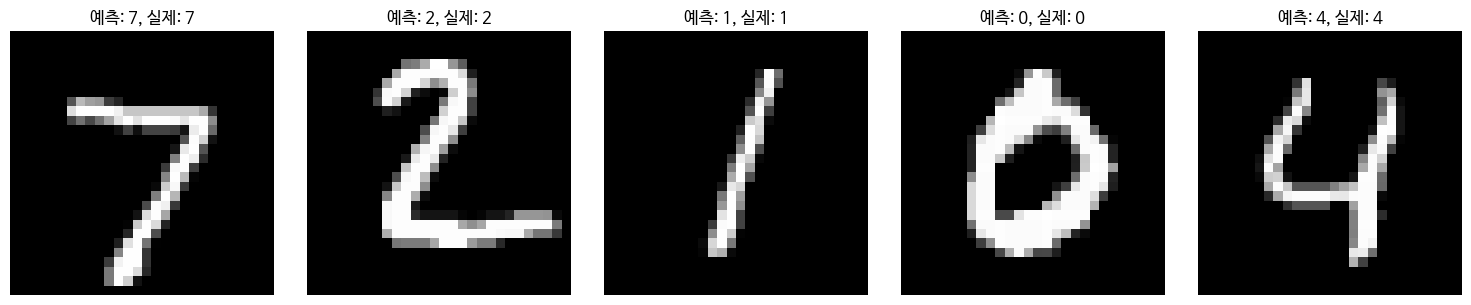

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import set_random_seed
import matplotlib.pyplot as plt
import tensorflow as tf

# 랜덤 시드 값 설정
set_random_seed(42)

## MNIST 데이터셋 로드 및 전처리
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## 이미지 데이터 형태 변환 및 정규화
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
## 타겟 레이블을 원-핫 인코딩
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

## CNN 모델 구축
# 이 모델은 이미지 처리에 특화된 합성곱 신경망(CNN)
# 입력 이미지의 형태는 **(높이, 너비, 채널)**이며, 28x28 흑백 이미지의 이므로 (28, 28, 1)
# **두 계층의 합성곱 층**, **평탄화 후 완전 연결층**, 그리고 **출력층**으로 구성
model = Sequential([
    Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=(28,28,1)), #합성곱층
    MaxPooling2D(pool_size=(2,2)), #"풀링층"
    Conv2D(32, kernel_size=(3,3), activation = 'relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(), #1차원으로 평탄화
    Dense(128, activation='relu'), #완전연결층
    Dense(10, activation='softmax') #출력층(10개클래스)
])


## 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## 모델 학습
model.fit(X_train, y_train, batch_size=128, epochs=5, validation_split=0.1, verbose=1)

## 모델 평가
score = model.evaluate(X_test, y_test, verbose=0)
print(f'테스트 정확도: {score[1]:.4f}')

## 예측 결과 시각화
predictions = model.predict(X_test[:5])
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    predicted_label = tf.argmax(predictions[i]).numpy()
    true_label = tf.argmax(y_test[i]).numpy()
    ax.set_title(f'예측: {predicted_label}, 실제: {true_label}')
    ax.axis('off')
plt.tight_layout()
plt.show()

## 9-11 IMDB 영화 리뷰 감성 분석 (LSTM 모델)

In [10]:
from tensorflow.keras.datasets import imdb #영화 리뷰 db
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import set_random_seed

# 랜덤 시드 값 설정
set_random_seed(42)

## 데이터셋 로드 및 전처리
vocab_size = 10000 ## 사용할 단어의 최대 개수
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size) ## IMDB 데이터셋 로드

# 학습 데이터 크기 축소
X_train = X_train[:len(X_train) // 20]
y_trian = y_train[:len(y_train) // 20]

max_length = 200 ## 시퀀스(리뷰)의 최대 길이
X_train = pad_sequences(X_train, maxlen=max_length) ## 시퀀스 길이 맞추기 (패딩)
X_test = pad_sequences(X_test, maxlen=max_length)

## LSTM 모델 구축
embedding_dim = 128 ## 임베딩 벡터 차원
# 이 모델은 시퀀스 데이터(예: 텍스트) 처리에 특화된 순환 신경망(Recurrent Neural Network, RNN)의 한 종류인 LSTM을 사용
# 주요 구성은 임베딩 층, LSTM 층, 그리고 출력층으로 구성
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),  #임베딩 층 : 단어를 수치로 변경
    LSTM(128, dropout=0.2, recurrent_dropout=0.2), #LSTM층
    Dense(1, activation='sigmoid') #이진분류 출력(긍정 or 부정)
])

## 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 모델 학습
model.fit(X_train, y_train, batch_size=32, epochs=1, validation_split=0.2)

## 모델 평가
score = model.evaluate(X_test, y_test, verbose=0)
print(f'테스트 정확도: {score[1]:.4f}')

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 31s 740ms/step - accuracy: 0.5005 - loss: 0.6916 - val_accuracy: 0.6040 - val_loss: 0.6832
테스트 정확도: 0.6303
